In [4]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#reading the data
dataset = pd.read_csv("D:/Desktop/course/Fall 2018/file.csv")

In [6]:
#finding columns with null values
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
dataset.shape

(23486, 11)

In [8]:
#dropping rows that have NAs in 3 columns
dataset.dropna(axis = 0, subset = ["Division Name", "Department Name","Class Name"], inplace = True)

In [9]:
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3809
Review Text                 844
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [10]:
dataset.shape

(23472, 11)

In [11]:
dataset[dataset["Review Text"].isna()].head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear


In [12]:
#replacing missing values in reviews based on rating
dataset.loc[(dataset["Review Text"].isna()) & (dataset["Rating"] >= 4),'Review Text'] = "Good"
dataset.loc[(dataset["Review Text"].isna()) & (dataset["Rating"] == 3),'Review Text'] = "Neutral"
dataset.loc[(dataset["Review Text"].isna()) & (dataset["Rating"] <= 2),'Review Text'] = "Bad"

In [13]:
dataset.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3809
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                 0
Department Name               0
Class Name                    0
dtype: int64

In [14]:
dataset.loc[(dataset["Rating"] >= 4),'Sentiment Category'] = "Good"
dataset.loc[(dataset["Rating"] == 3),'Sentiment Category'] = "Neutral"
dataset.loc[(dataset["Rating"] <= 2),'Sentiment Category'] = "Bad"
dataset

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Category
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good
5,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,Bad
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,Good
7,7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,Good
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,Good
9,9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,Good


## Visualization (Data Exploration)

Text(0.5,1,'sentiment Distribution')

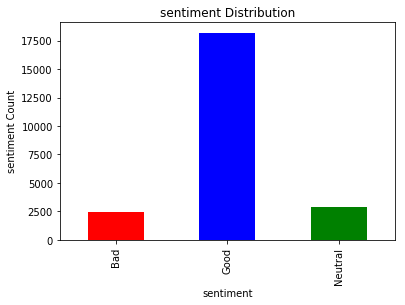

In [15]:
sentiment_freq = dataset.groupby(['Sentiment Category']).size()
sentiment_freq.plot.bar(color=['r','b','g'])
plt.xlabel('sentiment')
plt.ylabel('sentiment Count')
plt.title('sentiment Distribution')

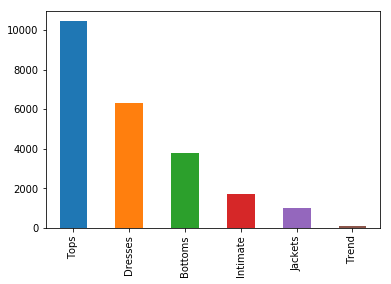

In [16]:
cloth_categ_freq = dataset['Department Name'].value_counts()
cloth_categ_freq.plot.bar()


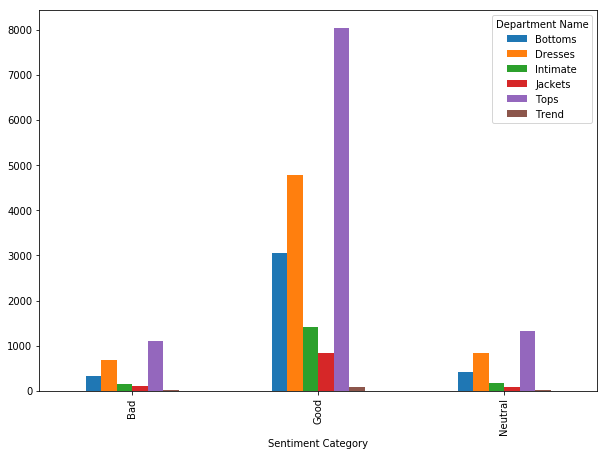

In [17]:
cloth_categ_freq = dataset.groupby(['Sentiment Category','Department Name']).size()
cloth_categ_freq.unstack().plot.bar(figsize= (10,7))



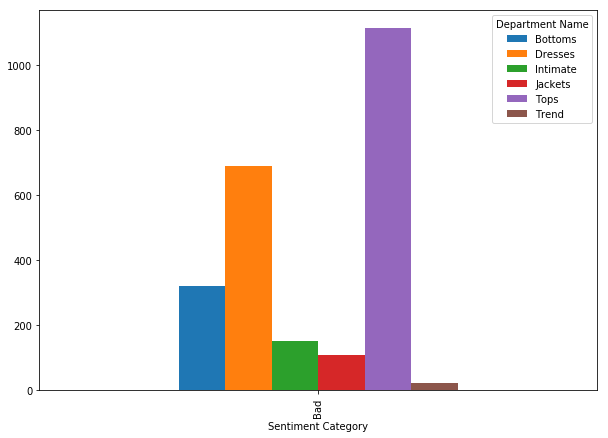

In [18]:
cloth_categ_freq = dataset[dataset['Sentiment Category'] == 'Bad'].groupby(['Sentiment Category','Department Name']).size()
cloth_categ_freq.unstack().plot.bar(figsize= (10,7))

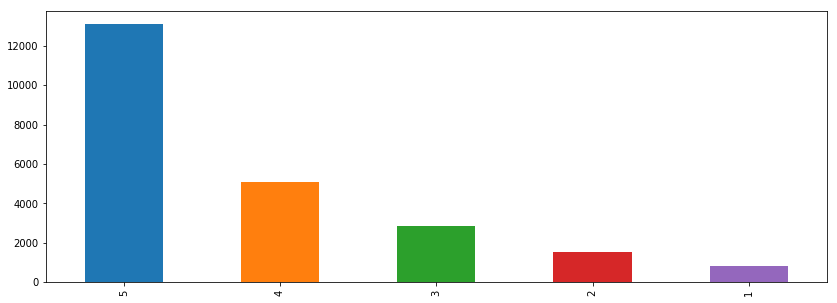

In [19]:
rating_freq = dataset['Rating'].value_counts()
rating_freq.plot.bar(figsize= (14,5))


## Now distribution with count 

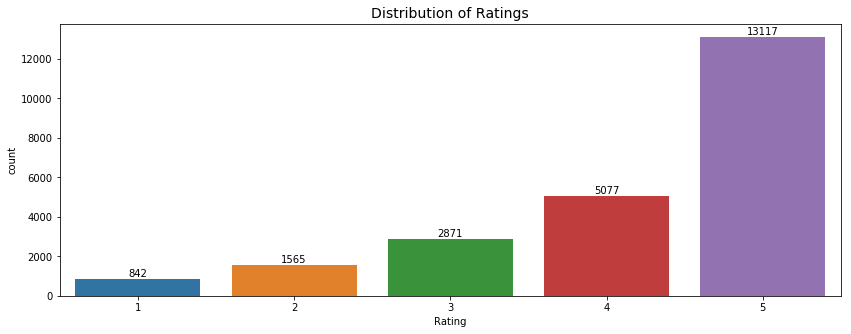

In [20]:
import seaborn as sns
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Rating', data=dataset)
ax.set_title("Distribution of Ratings", fontsize=14)

x=dataset['Rating'].value_counts(sort = False)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

In [21]:
dataset['Clothing ID'].value_counts()

1078    1024
862      806
1094     756
1081     582
872      545
829      527
1110     480
868      430
895      404
936      358
867      351
850      338
1095     327
863      306
1077     297
1059     294
1086     291
1080     289
860      288
1083     249
861      244
873      238
828      225
1092     220
1033     220
927      214
1056     213
820      211
1022     205
836      205
        ... 
56         1
1191       1
1175       1
1143       1
1127       1
1183       1
887        1
791        1
568        1
600        1
648        1
680        1
105        1
89         1
73         1
57         1
41         1
25         1
9          1
1176       1
1160       1
1032       1
856        1
808        1
792        1
776        1
744        1
728        1
712        1
0          1
Name: Clothing ID, Length: 1199, dtype: int64

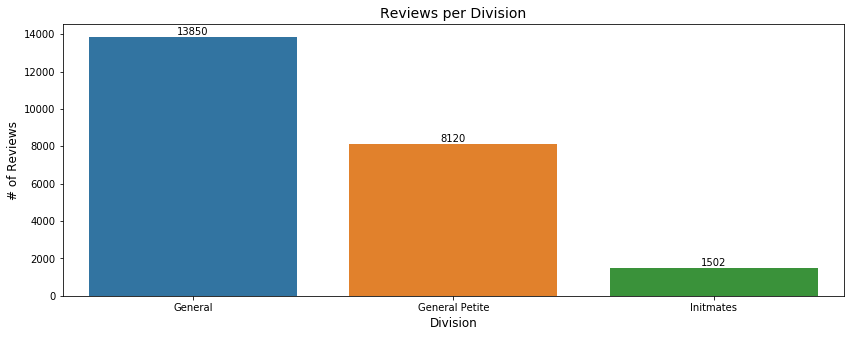

In [22]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Division Name', data=dataset, order = dataset['Division Name'].value_counts().index)
ax.set_title("Reviews per Division", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Division", fontsize=12)

x=dataset['Division Name'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

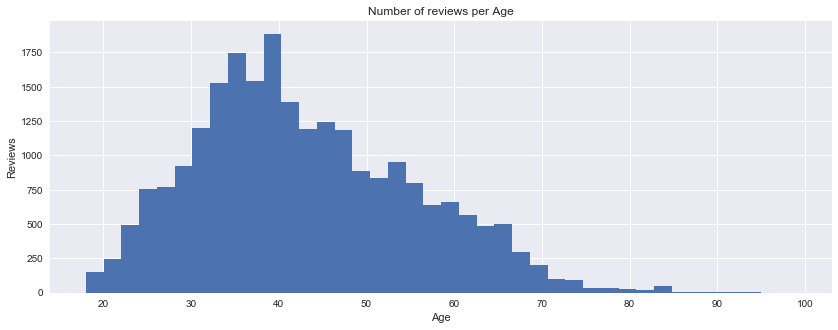

In [23]:
sns.set(rc={'figure.figsize':(14,5)})
plt.hist(dataset.Age, bins=40)
plt.xlabel('Age')
plt.ylabel('Reviews')
plt.title('Number of reviews per Age');

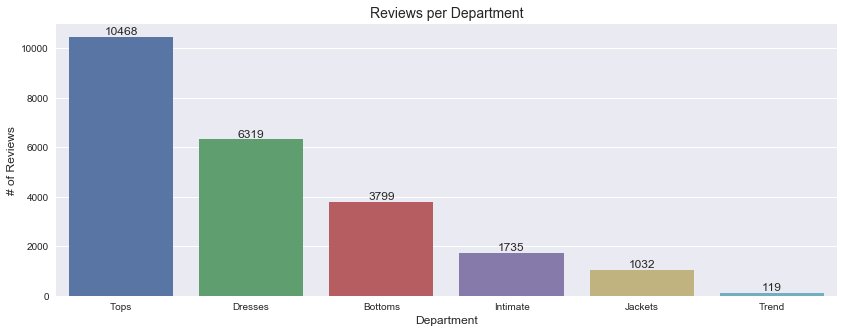

In [24]:
plt.figure(figsize= (14,5))
ax=sns.countplot(x='Department Name', data=dataset, order = dataset['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)

x=dataset['Department Name'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

In [25]:
dataset['Length Review'] = dataset['Review Text'].apply(len)
dataset.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Category,Length Review
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,Good,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,Good,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,Neutral,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,Good,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,Good,192


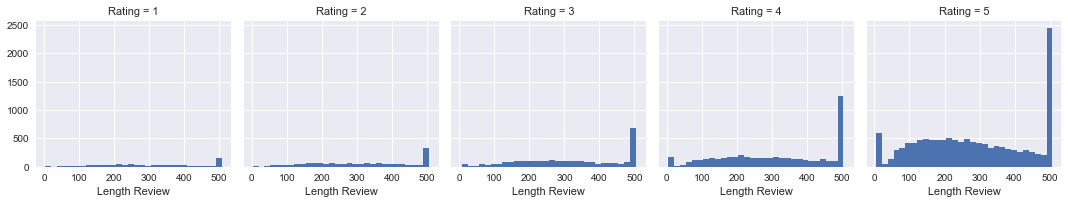

In [26]:
grid_data = sns.FacetGrid(dataset, col='Rating')
grid_data.map(plt.hist,'Length Review',bins=30)

### length of review text increases as rating increases.

In [27]:
import re
def clean_data(text):
    letters_only = re.sub("[^a-zA-Z]", " ", text) #replacing all except alphabet with space
    words = letters_only.lower().split()            #splitting string into list                 
    return( " ".join( words ))                      #joining all words back again forming one text

In [28]:
!pip install wordcloud

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords= set(STOPWORDS)|{'skirt','one','look','looked','looks','blouse','dress','sweater', 'shirt','bottom', 'pant', 'pants' 'jean', 'jeans','jacket', 'top', 'dresse'}

def create_cloud(rating):
    x= [i for i in rating]
    y= ' '.join(x)    # make one string by joining all string
    cloud = WordCloud(background_color='white',width=1600, height=800,max_words=100,stopwords= stopwords).generate(y)
    plt.figure(figsize=(15,7.5))
    plt.axis('off')
    plt.imshow(cloud, interpolation='bilinear')
    plt.show()

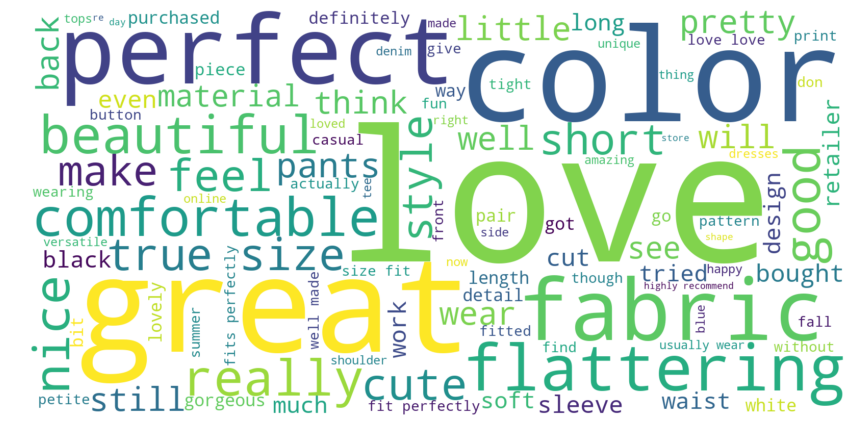

In [30]:
rating5= dataset[dataset['Rating']==5]['Review Text'].apply(clean_data)
create_cloud(rating5)


### Top Words in Rating = 5
* love
* color
* great
* comfortable
* look
* one
* perfect

Words to consider when designing women's clothing: comfortable, soft, beautiful, well made, detail, design, versatile

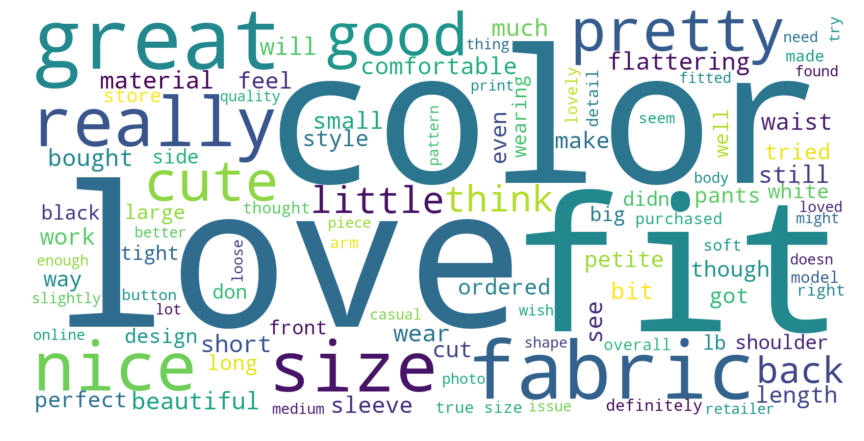

In [31]:
rating4= dataset[dataset['Rating']==4]['Review Text'].apply(clean_data)
create_cloud(rating4)

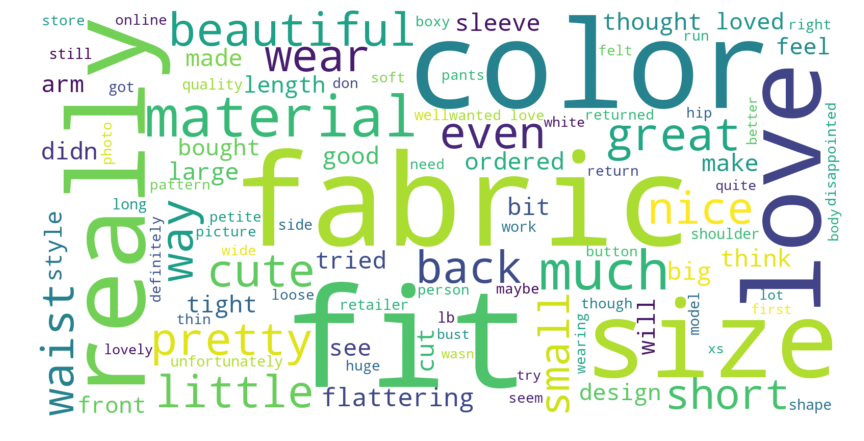

In [32]:
rating3= dataset[dataset['Rating']==3]['Review Text'].apply(clean_data)
create_cloud(rating3)

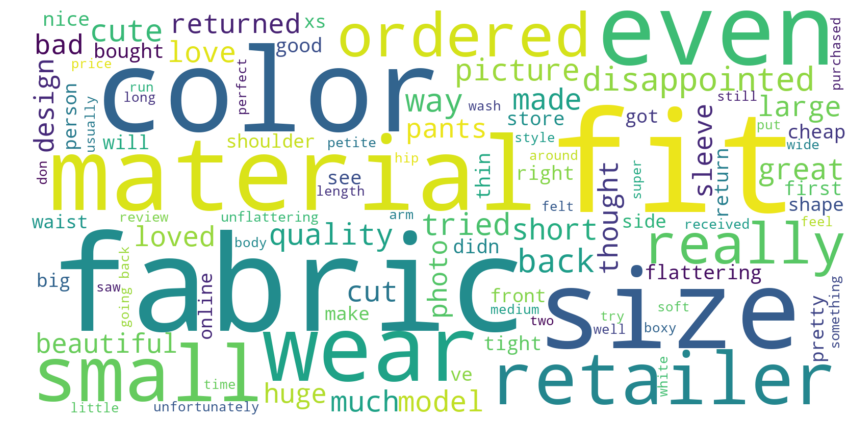

In [33]:
rating1= dataset[dataset['Rating']==1]['Review Text'].apply(clean_data)
create_cloud(rating1)

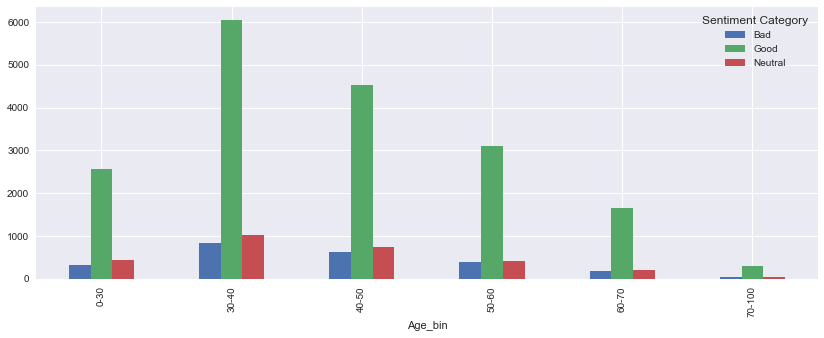

In [34]:
#Age_bin = pd.cut(dataset['Age'], [0,30,50,60,70,100], labels=['0-30','30-50','50-60','60-70','70-100'])
Age_bin = pd.cut(dataset['Age'], [0,30,40,50,60,70,100], labels=['0-30','30-40','40-50','50-60','60-70','70-100'])
dataset['Age_bin'] = Age_bin
age_bins_grp = dataset.groupby(['Sentiment Category', 'Age_bin']).size()
age_bins_grp
age_bins_grp = age_bins_grp.unstack(0)
age_bins_grp.plot.bar()

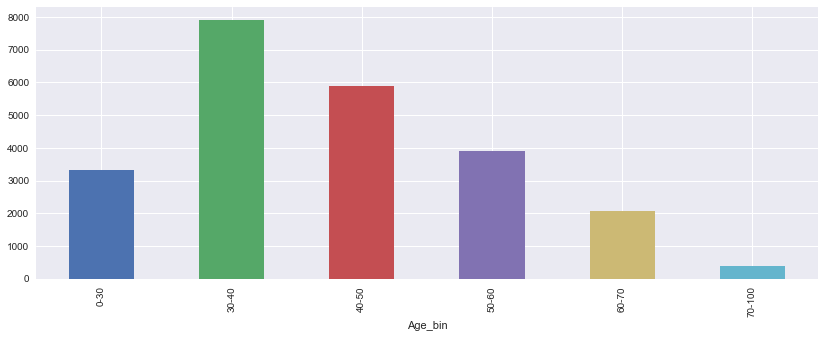

In [35]:
dataset.groupby('Age_bin').size().plot.bar()

# Text Pre-processing

In [36]:
# Convert to Lower case
dataset['Review Text'] = dataset['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Removing Punctuation
dataset['Review Text'] = dataset['Review Text'].str.replace('[^\w\s]','')
# Removal of Stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
dataset['Review Text'] = dataset['Review Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
#Tokenization
tokenized_review = dataset['Review Text'].apply(lambda x: x.split())
tokenized_review = tokenized_review.tolist()

In [38]:
# using word2vec to extract features
import gensim
model_w2v = gensim.models.Word2Vec(
            tokenized_review,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 4, # no.of cores
            seed = 34)

C:\Users\ALEKHYA\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [39]:
model_w2v.wv.most_similar(positive="jeans")

[('jean', 0.7853884696960449),
 ('capris', 0.7446654438972473),
 ('cords', 0.7353103756904602),
 ('crops', 0.7345322966575623),
 ('skinnys', 0.7336170673370361),
 ('pant', 0.7314368486404419),
 ('skinnies', 0.7165472507476807),
 ('trouser', 0.7153988480567932),
 ('jeggings', 0.7065509557723999),
 ('trousers', 0.7060340642929077)]

In [41]:
model_w2v.wv.save_word2vec_format('D:/Desktop/course/Fall 2018/test_review', 
                                  binary=False)

In [44]:
# array is created for all words and saved in embedding_index
import os
embeddings_index = {}
str_path = "D:/Desktop/course/Fall 2018/test_review"
f = open(str_path)
for line in f:
    values = line.split()    
    word = values[0]
    coefs = np.asarray(values[1:])
    embeddings_index[word] = coefs
f.close()

In [45]:
#turning each text into either a sequence of integers (each integer being the index of a token in a dictionary)
from tensorflow.python.keras.preprocessing.text import Tokenizer
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tokenized_review) #Updates internal vocabulary based on a list of texts.
sequences = tokenizer_obj.texts_to_sequences(tokenized_review) #Transforms each text in texts to a sequence of integers. Only top "num_words" most frequent words will be taken into account.

C:\Users\ALEKHYA\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [46]:
# pad_sequence takes a LIST of sequences as an input (list of list) and will return a list of padded sequences.
# For the sake of simplicity of implementation, keras only accepts sequences of the same length in a batch.
# So if your sequences don't have the same length, this is where the pad_sequence is useful.
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
word_index = tokenizer_obj.word_index #creates a dict for unique words like for 'dress' assigns index 1,..
print('Found %s unique tokens' %len(word_index))
review_pad = pad_sequences(sequences)
sentiment = dataset['Sentiment Category'].values
print('Shape of review tensor:' , review_pad.shape)
print('Shape of sentiment tensor:' , sentiment.shape)

Found 19242 unique tokens
Shape of review tensor: (23472, 63)
Shape of sentiment tensor: (23472,)


In [47]:
num_words = len(word_index)+1
embedding_matrix = np.zeros((num_words, 200))
for word, i in word_index.items():
    if i> num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros
        embedding_matrix[i] = embedding_vector
print(num_words)

19243


# Modeling - Predicting Sentiment Using Word2Vec

In [49]:
#Label Encoding
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
sentiment = labelencoder_y.fit_transform(sentiment)
sentiment = to_categorical(sentiment)

#train and test dataset split
test_split = 0.3
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
sentiment = sentiment[indices]
num_test_samples= int(test_split*review_pad.shape[0])

X_train_pad = review_pad[:-num_test_samples]
y_train = sentiment[:-num_test_samples]
X_test_pad = review_pad[-num_test_samples:]
y_test = sentiment[-num_test_samples:]
# MultiLayer Perceptron (MLP) for multi-class softmax classification

from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, GRU
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

#define model
model = Sequential()
embedding_layer = Embedding(num_words,200, embeddings_initializer=Constant(embedding_matrix),
                           trainable=False)
model.add(embedding_layer)
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))

#try using different optimizers and different optimizer configs
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])


Using TensorFlow backend.


In [50]:
model.fit(X_train_pad,y_train, epochs=25,verbose=2)
model.predict(X_test_pad)
y_pred = model.predict_classes(X_test_pad)

Epoch 1/25
 - 24s - loss: 0.5477 - acc: 0.7884
Epoch 2/25
 - 22s - loss: 0.4662 - acc: 0.8093
Epoch 3/25
 - 21s - loss: 0.4433 - acc: 0.8172
Epoch 4/25
 - 21s - loss: 0.4262 - acc: 0.8233
Epoch 5/25
 - 20s - loss: 0.4159 - acc: 0.8304
Epoch 6/25
 - 20s - loss: 0.4089 - acc: 0.8333
Epoch 7/25
 - 20s - loss: 0.4023 - acc: 0.8352
Epoch 8/25
 - 21s - loss: 0.3969 - acc: 0.8381
Epoch 9/25
 - 21s - loss: 0.3916 - acc: 0.8379
Epoch 10/25
 - 20s - loss: 0.3857 - acc: 0.8400
Epoch 11/25
 - 20s - loss: 0.3832 - acc: 0.8400
Epoch 12/25
 - 20s - loss: 0.3767 - acc: 0.8437
Epoch 13/25
 - 20s - loss: 0.3736 - acc: 0.8449
Epoch 14/25
 - 20s - loss: 0.3690 - acc: 0.8463
Epoch 15/25
 - 20s - loss: 0.3643 - acc: 0.8489
Epoch 16/25
 - 21s - loss: 0.3624 - acc: 0.8499
Epoch 17/25
 - 20s - loss: 0.3591 - acc: 0.8516
Epoch 18/25
 - 20s - loss: 0.3543 - acc: 0.8502
Epoch 19/25
 - 20s - loss: 0.3501 - acc: 0.8575
Epoch 20/25
 - 20s - loss: 0.3472 - acc: 0.8555
Epoch 21/25
 - 20s - loss: 0.3469 - acc: 0.8552
E

In [51]:
model.evaluate(y_pred,y_test)

7041/7041 [==============================] - 0s 63us/step


[0.9337063222391296, 0.8217582729725891]

#  Modeling - Predicting Sentiment using TF-IDF

In [52]:
dataset['Sentiment_numeric'] = dataset['Sentiment Category'].apply(lambda x : 0 if x == 'Bad' else 1 if x == 'Neutral' else 2)
dataset.head(10)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Sentiment Category,Length Review,Age_bin,Sentiment_numeric
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,Good,53,30-40,2
1,1,1080,34,NaN,love dress sooo pretty happened find store im ...,5,1,4,General,Dresses,Dresses,Good,303,30-40,2
2,2,1077,60,Some major design flaws,high hopes dress really wanted work initially ...,3,0,0,General,Dresses,Dresses,Neutral,500,50-60,1
3,3,1049,50,My favorite buy!,love love love jumpsuit fun flirty fabulous ev...,5,1,0,General Petite,Bottoms,Pants,Good,124,40-50,2
4,4,847,47,Flattering shirt,shirt flattering due adjustable front tie perf...,5,1,6,General,Tops,Blouses,Good,192,40-50,2
5,5,1080,49,Not for the very petite,love tracy reese dresses one petite 5 feet tal...,2,0,4,General,Dresses,Dresses,Bad,488,40-50,0
6,6,858,39,Cagrcoal shimmer fun,aded basket hte last mintue see would look lik...,5,1,1,General Petite,Tops,Knits,Good,496,30-40,2
7,7,858,39,"Shimmer, surprisingly goes with lots",ordered carbon store pick ton stuff always try...,4,1,4,General Petite,Tops,Knits,Good,482,30-40,2
8,8,1077,24,Flattering,love dress usually get xs runs little snug bus...,5,1,0,General,Dresses,Dresses,Good,166,0-30,2
9,9,1077,34,Such a fun dress!,im 55 125 lbs ordered petite make sure length ...,5,1,0,General,Dresses,Dresses,Good,360,30-40,2


In [53]:
from sklearn.cross_validation import train_test_split
train,test = train_test_split(dataset, test_size = 0.3, random_state = 0)

C:\Users\ALEKHYA\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
train_review = train['Review Text']
train_senti = train['Sentiment_numeric']
test_review = test['Review Text']
test_senti = test['Sentiment_numeric']

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, stop_words='english')
tfidf = vectorizer.fit_transform(train_review)
tfidf.shape

(16430, 4027)

In [56]:
tfidf_test = vectorizer.transform(test_review)
tfidf_test.shape

(7042, 4027)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
#from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [58]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    MultinomialNB()]

In [59]:
dense_train_review=tfidf.toarray()
dense_test_review= tfidf_test.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
        if(classifier.__class__.__name__ == 'GaussianNB'):
            fit = classifier.fit(dense_train_review,train_senti)
            pred = fit.predict(dense_test_review)
        else:
            fit = classifier.fit(tfidf,train_senti)
            pred = fit.predict(tfidf_test)   
        accuracy = accuracy_score(pred,test_senti)
        Accuracy.append(accuracy)
        Model.append(classifier.__class__.__name__)
        print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))   

Accuracy of LogisticRegression is 0.7790400454416359
Accuracy of KNeighborsClassifier is 0.775773927861403
Accuracy of SVC is 0.7790400454416359
Accuracy of DecisionTreeClassifier is 0.7320363533087191
Accuracy of RandomForestClassifier is 0.8024708889520022
Accuracy of AdaBoostClassifier is 0.8030389094007384
Accuracy of MultinomialNB is 0.7943765975575121


__Text Blob__

In [121]:
dataset.loc[(dataset["Rating"] >= 4),'Actual sentiment'] = 1
dataset.loc[(dataset["Rating"] == 3),'Actual sentiment'] = 0
dataset.loc[(dataset["Rating"] <= 2),'Actual sentiment'] = -1
dataset['Actual sentiment'].head(5)

0    1.0
1    1.0
2    0.0
3    1.0
4    1.0
Name: Actual sentiment, dtype: float64

In [122]:
#textblob will allow us to do sentiment analysis in a very simple way
#create a classifier to analyze the polarity of each tweet after cleaning the text in it
from textblob import TextBlob
import re

def clean_review(review):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", review).split())

def analyze_sentiment(review):
    analysis = TextBlob(clean_review(review))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [123]:
dataset['SA'] = np.array([ analyze_sentiment(review) for review in dataset['Review Text']])
dataset['SA'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: SA, dtype: int32

In [124]:
accuracy_score(dataset['Actual sentiment'],dataset['SA'])

0.7745398773006135

## Testing Best model performance. created new file with new reviews 

In [74]:
dataset_test = pd.read_excel("D:/Desktop/course/Fall 2018/test_review.xlsx")

In [75]:
dataset_test.head()

,Review,Rating,Sentiment
0,Got this dress for our youth choir girls to ma...,5,Good
1,"This dress is beautiful! I am 5' 3"" and 170lbs...",4,Good
2,Returned....smaller than expected poor quality...,1,Bad
3,"I don't even know how to explain this, the pro...",1,Bad
4,"this blouse fits okay, but the sowing is very ...",3,Neural


In [76]:
dataset_test['Sentiment_numeric'] = dataset_test['Sentiment'].apply(lambda x : 0 if x == 'Bad' else 1 if x == 'Neural' else 2)
dataset_test

,Review,Rating,Sentiment,Sentiment_numeric
0,Got this dress for our youth choir girls to ma...,5,Good,2
1,"This dress is beautiful! I am 5' 3"" and 170lbs...",4,Good,2
2,Returned....smaller than expected poor quality...,1,Bad,0
3,"I don't even know how to explain this, the pro...",1,Bad,0
4,"this blouse fits okay, but the sowing is very ...",3,Neural,1
5,"This top was not made for a woman, it would be...",1,Bad,0
6,Terrible quality. The shirt is cheaply made an...,1,Bad,0


### testing performance using AdaBoostClassifier model

In [77]:
tfidf_test_1 = vectorizer.transform(dataset_test['Review'])

In [78]:
ada_model = AdaBoostClassifier()
ada_model.fit(tfidf,train_senti )
pred = ada_model.predict(tfidf_test_1)
pred
accuracy = accuracy_score(pred,dataset_test['Sentiment_numeric'])
accuracy

0.5714285714285714

### testing performance using MultinomialNB model

In [79]:
dense_test_review= tfidf_test_1.toarray()
dense_train_review=tfidf.toarray()
from sklearn.naive_bayes import MultinomialNB 
model = MultinomialNB ()
model.fit(dense_train_review,train_senti)
pred = model.predict(dense_test_review)

In [80]:
pred
accuracy = accuracy_score(pred,dataset_test['Sentiment_numeric'])
accuracy

0.7142857142857143

__Testing performance using RandomForest__

In [115]:
dense_test_review= tfidf_test_1.toarray()
dense_train_review=tfidf.toarray()
import random
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1000)
model.fit(dense_train_review,train_senti)
pred = model.predict(dense_test_review)

In [116]:
pred
accuracy = accuracy_score(pred,dataset_test['Sentiment_numeric'])
accuracy

0.5714285714285714